In [1]:
## library(igraph)
library(Seurat)
library(tidyverse)
library(ggplot2)
library(ggrepel)
library(ggbeeswarm)
library(patchwork)
library(writexl)
options(ggrepel.max.overlaps = Inf)

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
cgsf_all = qs::qread('_targets/objects/combined_gost_seurat_formatted')
cgsf_all %>% head(1)

tag,data_day,cluster,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,⋯,recall,term_id,source,term_name,effective_domain_size,source_order,parents,evidence_codes,intersection,gene_ids
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>,<chr>,<chr>,<chr>
a1_Tany__Astrocytes___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_neg_restored,all,a1_Tany__Astrocytes,all,obob14v14,all,obob14vBL6,bl6_grouping,neg,neg_restored,⋯,0.01529988,GO:0048699,GO:BP,generation of neurons,26856,13608,GO:0022008,"IBA,IDA IMP ISO IBA IEA,IEA,ISO,ISO IEA,ISO IEA,IMP IGI,ISO,IEA,IMP,IMP IGI IBA IEA,IMP IGI,ISO,IMP ISS ISO IBA IEA,IBA,IDA,IDA IGI ISO NAS,ISO IBA,IBA,IDA IMP IGI,IEA,IMP IGI ISO IEA,IEA,IDA IMP,IMP","ENSMUSG00000024421,ENSMUSG00000032537,ENSMUSG00000052516,ENSMUSG00000031283,ENSMUSG00000013089,ENSMUSG00000025089,ENSMUSG00000023951,ENSMUSG00000020467,ENSMUSG00000022240,ENSMUSG00000032036,ENSMUSG00000027797,ENSMUSG00000021318,ENSMUSG00000059974,ENSMUSG00000027253,ENSMUSG00000021613,ENSMUSG00000040037,ENSMUSG00000024109,ENSMUSG00000004892,ENSMUSG00000031342,ENSMUSG00000021743,ENSMUSG00000032482,ENSMUSG00000027168,ENSMUSG00000041544,ENSMUSG00000039004,ENSMUSG00000017724","Lama3,Ephb1,Robo2,Chrdl1,Etv5,Gfra1,Vegfa,Efemp1,Ctnnd2,Kirrel3,Dclk1,Gli3,Ntm,Lrp4,Hapln1,Negr1,Nrxn1,Bcan,Gpm6b,Fezf2,Cspg5,Pax6,Disp3,Bmp6,Etv4"


In [3]:
combined_deg_seurat_all = qs::qread('_targets/objects/combined_deg_seurat_formatted')
combined_deg_seurat_all %>% head

tag,data_day,cluster,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
a1_Tany__Astrocytes___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_neg_restored,all,a1_Tany__Astrocytes,all,obob14v14,all,obob14vBL6,bl6_grouping,neg,neg_restored,Lypd6,1.696647e-41,0.7388235,0.267,0.028,3.259938e-37,ENSMUSG00000050447,26.95730
a1_Tany__Astrocytes___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_neg_restored,all,a1_Tany__Astrocytes,all,obob14v14,all,obob14vBL6,bl6_grouping,neg,neg_restored,C030018K13Rik,1.585209e-58,0.4796239,0.208,0.011,3.045821e-54,ENSMUSG00000105352,25.66770
a1_Tany__Astrocytes___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_neg_restored,all,a1_Tany__Astrocytes,all,obob14v14,all,obob14vBL6,bl6_grouping,neg,neg_restored,Lama3,4.981951e-40,0.5509080,0.218,0.019,9.572321e-36,ENSMUSG00000024421,19.29224
a1_Tany__Astrocytes___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_neg_restored,all,a1_Tany__Astrocytes,all,obob14v14,all,obob14vBL6,bl6_grouping,neg,neg_restored,Ptchd4,2.597981e-20,1.1573415,0.228,0.041,4.991760e-16,ENSMUSG00000042256,17.70935
a1_Tany__Astrocytes___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_neg_restored,all,a1_Tany__Astrocytes,all,obob14v14,all,obob14vBL6,bl6_grouping,neg,neg_restored,Fam184b,6.743847e-32,0.4357543,0.228,0.026,1.295763e-27,ENSMUSG00000015879,11.71633
a1_Tany__Astrocytes___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_neg_restored,all,a1_Tany__Astrocytes,all,obob14v14,all,obob14vBL6,bl6_grouping,neg,neg_restored,Ephb1,1.190966e-14,1.1460261,0.257,0.068,2.288321e-10,ENSMUSG00000032537,11.04825


In [4]:
nhgc = qs::qread('_targets/objects/nhgc_NG2_OPC2___Day14.obob14v14__v__Day14.obobBL6d14') # Astrocytes___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.pos_vs_none
nhgc %>% group_by(fgf1_grouping) %>% summarise(n=n())
nhgc %>% group_by(restored_grouping) %>% summarise(n=n())
# don't worry about this now, just state all markers for all clusters you want

fgf1_grouping,n
<chr>,<int>
neg,463
none,919


restored_grouping,n
<fct>,<int>
neg_away,463
none,919


In [5]:
tag2 = combined_deg_seurat_all %>% 
    pull(tag) %>% unique %>%
    str_split(pattern = "___") %>%
    map_chr(~if (length(.x) >= 3) paste(.x[1:2], collapse = "___") else .x[1]) %>%
    unique
        
tag2_tibble = tag2 %>% tibble(tag2=.) %>%
mutate(path_to_target = paste0('_targets/objects/nhgc_', tag2)) %>%
mutate(obj = purrr::map(path_to_target, ~if (file.exists(.x)) qs::qread(.x) else NA))
    
combined_tibble <- tag2_tibble %>%
  mutate(obj = map2(obj, tag2, ~if (!is.na(.x)) mutate(.x, tag2 = .y) else tibble())) %>%
  pull(obj) %>%
  map_dfr(identity)

Warning message:
“There were 394 warnings in `mutate()`.
The first warning was:
ℹ In argument: `obj = map2(obj, tag2, ~if (!is.na(.x)) mutate(.x, tag2 = .y)
  else tibble())`.
Caused by warning in `if (!is.na(.x)) ...`:
! the condition has length > 1 and only the first element will be used
ℹ Run `dplyr::last_dplyr_warnings()` to see the 393 remaining warnings.”


In [6]:
library(dplyr)
library(tidyr)

# Tibble for fgf1_grouping
fgf1_tibble <- combined_tibble %>% 
  filter(fgf1_grouping %in% c('neg', 'none', 'pos')) %>%
  group_by(tag2, fgf1_grouping) %>%
  summarise(count = n(), .groups = "drop") %>%
  pivot_wider(names_from = fgf1_grouping, values_from = count, names_prefix = "fgf1_", values_fill = 0)

# Tibble for fgf1_grouping with _restored
restored_tibble <- combined_tibble %>% 
  mutate(fgf1_grouping_restored = str_replace_all(fgf1_grouping, c("neg" = "neg_restored", "pos" = "pos_restored"))) %>%
  filter(fgf1_grouping_restored %in% c('neg_restored', 'none', 'pos_restored')) %>%
  group_by(tag2, fgf1_grouping_restored) %>%
  summarise(count = n(), .groups = "drop") %>%
  pivot_wider(names_from = fgf1_grouping_restored, values_from = count, names_prefix = "restored_", values_fill = 0)



In [7]:
n_cells_cutoff = 250

# Create the first tibble
fgf1_tibble_new <- fgf1_tibble %>%
  pivot_longer(cols = starts_with("fgf1_"), names_to = "grouping", values_to = "count") %>%
  mutate(grouping = str_replace(grouping, "fgf1_", "")) %>%
  mutate(polarity1 = ifelse(grouping == "none", NA, grouping),
         polarity2 = ifelse(grouping == "none", grouping, "none")) %>%
  mutate(tag = paste0(tag2, "___fgf1_grouping.", polarity1, "_vs_", polarity2)) %>%
  mutate(n_cells_valid = ifelse(count >= n_cells_cutoff, TRUE, FALSE)) %>%
  select(tag, n_cells_valid)

# Create the second tibble
restored_tibble_new <- restored_tibble %>%
  pivot_longer(cols = starts_with("restored_"), names_to = "grouping", values_to = "count") %>%
  mutate(grouping = str_replace(grouping, "restored_", "")) %>%
  mutate(polarity1 = ifelse(grouping == "none", NA, grouping),
         polarity2 = ifelse(grouping == "none", grouping, "none")) %>%
  mutate(tag = paste0(tag2, "___restored_grouping.", polarity1, "_vs_", polarity2)) %>%
  mutate(n_cells_valid = ifelse(count >= n_cells_cutoff, TRUE, FALSE)) %>%
  select(tag, n_cells_valid)

# Bind the rows of the two tibbles
new_tibble <- bind_rows(fgf1_tibble_new, restored_tibble_new) %>%
    filter(!str_detect(tag, 'NA'))

new_tibble %>% filter(str_detect(tag, 'NG2_OPC2___Day5.obob5v5__v__Day5.obobBL6d5'))

tag,n_cells_valid
<chr>,<lgl>
NG2_OPC2___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,TRUE
NG2_OPC2___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,FALSE
NG2_OPC2___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.neg_restored_vs_none,TRUE
NG2_OPC2___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,FALSE


In [8]:
labels_classes_tib = qs::qread('labels_classes_tib.qs') %>%
rename(cluster = labels)

labels_classes_tib %>% head

cluster,class
<chr>,<chr>
NG2_OPC2__Microglia,other
NFOL,other
MOL,other
NG2_OPC2,other
Astrocytes,other
b2_Tany,other


In [9]:
combined_deg_seurat = combined_deg_seurat_all %>%
filter(p_val_adj < 0.05 &
       avg_log2FC > 0 &
       !(str_detect(cells_b, '(rest|neg|pos)')) &
       fgf1_day != 'all' &
       bl6_day != 'all'
#        cluster == 'Agrp' 
#        cells_a == 'neg'
       ) %>%
left_join(labels_classes_tib, by='cluster') %>% 
left_join(new_tibble, by='tag') %>%
relocate(class, .after='cluster')

In [10]:
combined_deg_seurat %>% pull(fgf1_comparison) %>% unique
combined_deg_seurat %>% pull(bl6_comparison) %>% unique
combined_deg_seurat %>% pull(grouping) %>% unique
combined_deg_seurat %>% pull(cells_a) %>% unique
combined_deg_seurat %>% pull(cells_b) %>% unique

[1] "obob14v14" "obob5v5"

[1] "obobBL6d14" "obobBL6d5"

[1] "bl6_grouping"      "fgf1_grouping"     "restored_grouping"

[1] "neg"          "pos"          "neg_restored" "pos_restored"

[1] "none"

In [11]:
cluster_order = combined_deg_seurat %>%
filter(fgf1_day == 'Day5'  &
       grouping == 'fgf1_grouping') %>%
group_by(cluster) %>%
summarise(n=n()) %>% 
arrange(desc(n)) %>%
pull(cluster)

In [12]:
options(repr.plot.width=7, repr.plot.height=2)
markers = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other')

# Set dimensions
options(repr.plot.width=7, repr.plot.height=2)

# Load necessary library
make_marker_bars = function(markers){
    # Grouping and counting
    markers_summary <- markers %>%
      group_by(cluster, cells_a, n_cells_valid) %>%
      summarise(n = if_else(all(n_cells_valid), n(), NA), .groups = "drop") %>%
      # Adding missing combinations with count 0
      tidyr::complete(cluster, cells_a, fill = list(n = 0))

    # Calculate upper limit for y-axis, considering some space for the labels
    upper_limit <- max(markers_summary$n) * 1.25  # You can adjust the multiplier to get a suitable space for the labels

    # Plotting
    ggplot(markers_summary, aes(x = cluster, y = n, fill = cells_a)) +
      geom_bar(stat = "identity", position = position_dodge()) +
      geom_text(aes(label=n), vjust=-0.3, position = position_dodge(0.9), size=2.5, check_overlap = TRUE) +
      xlab("Cluster") +
      theme_classic() +
      theme(axis.title.y = element_blank(), 
            axis.title.x = element_blank(), 
            plot.title = element_blank(), 
            axis.text.x = element_text(angle = 45, hjust = 1, size = 6), 
            legend.text = element_text(size = 6),
            legend.title = element_text(size = 7)) +
      scale_fill_brewer(palette = "Set1") +  # You can choose any other palette
      ylim(0, upper_limit)  # Setting the limits for y-axis
}


In [13]:
make_marker_bars = function(markers, cluster_categories, y_upper_limit=150){
    # Grouping and counting
    markers_summary <- markers %>%
          mutate(cluster = factor(cluster)) %>%  # Make sure that 'cluster' is a factor
          group_by(cluster, cells_a) %>%
          summarise(n = if_else(all(n_cells_valid), n(), 0L), .groups = "drop") %>%
          ungroup %>%
          filter(cluster %in% cluster_categories) %>%
          mutate(cluster = droplevels(cluster))  %>%
      # Adding missing combinations with count 0
      tidyr::complete(cluster, cells_a, fill = list(n = 0))

        # Create a factor with all possible levels
        all_clusters <- factor(markers_summary$cluster, levels = c(cluster_categories, unique(markers_summary$cluster)))

        # Joining with expanded frame to ensure all combinations
        markers_summary <- tidyr::expand_grid(cluster = cluster_categories, cells_a = unique(markers_summary$cells_a)) %>%
          left_join(markers_summary, by = c("cluster", "cells_a")) %>%
          replace_na(list(n = 0)) %>%
          mutate(n_label = case_when(n == 0 ~ '',
                               TRUE ~ paste0(n)))

        # Plotting
        ggplot(markers_summary, aes(x = cluster, y = n, fill = cells_a)) +
          geom_bar(stat = "identity", position = position_dodge()) +
          geom_text(aes(label=n_label), vjust=-0.3, position = position_dodge(0.9), size=2.5, check_overlap = FALSE) +
#           geom_text_repel(data = subset(markers_summary, n > 0), aes(label = n), 
#                           size = 2.5, force = 0, segment.size = 0.2, nudge_y = 0.5) +
          scale_x_discrete(drop = FALSE, limits = cluster_categories) +  # Ensures that all levels are shown on x-axis
          xlab("Cluster") +
          theme_classic() +
          theme(axis.title.y = element_blank(), 
                axis.title.x = element_blank(), 
#                 plot.title = element_blank(), 
                axis.text.x = element_text(angle = 45, hjust = 1, size = 6), 
                legend.text = element_text(size = 6),
                legend.title = element_text(size = 7)) +
#           scale_fill_brewer(palette = "Set1") +  # You can choose any other palette
    scale_fill_manual(values = c("neg" = "#d73027", "pos" = "#4575b4", "neg_restored" = "#a50026", "pos_restored" = "#313695")) +
          ylim(0, y_upper_limit)  # Setting the limits for y-axis
}


In [14]:
cluster_categories = labels_classes_tib %>% filter(class == 'other') %>% pull(cluster)
cluster_categories

[1] "NG2_OPC2__Microglia"        "NFOL"                      
 [3] "MOL"                        "NG2_OPC2"                  
 [5] "Astrocytes"                 "b2_Tany"                   
 [7] "a2_Tanycytes"               "MOL__a2_Tanycytes"         
 [9] "b1_Tanycytes"               "a1_Tany__Astrocytes"       
[11] "Fibroblasts2__Fibroblasts3" "Microglia"                 
[13] "a2_Tanycytes__b1_Tanycytes" "Epend"                     
[15] "Endothelial"                "Mural_Cells2"              
[17] "Parstuber2A__ParsTuber1"

In [15]:
cluster_categories %>% length

[1] 17

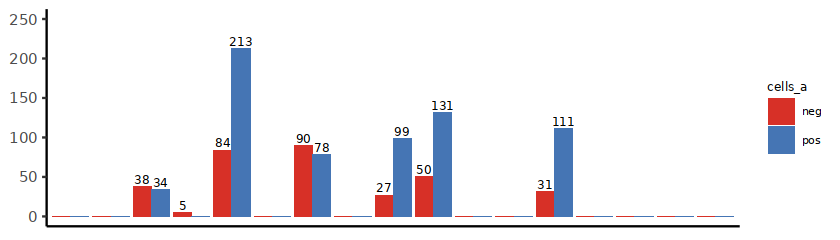

In [16]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other')
ggp_d5_other = make_marker_bars(markers_d5_other, cluster_categories, 250) +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_other

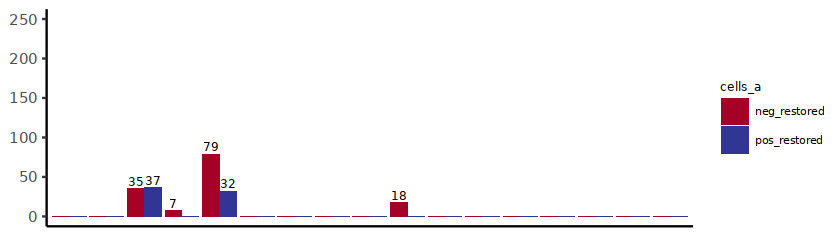

In [17]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'other')
ggp_d5_other_restored = make_marker_bars(markers_d5_other, cluster_categories, 250)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_other_restored

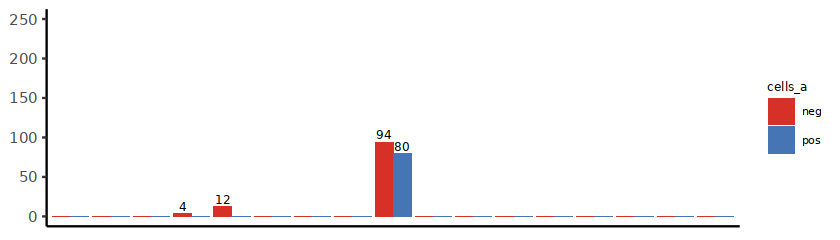

In [18]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'other')
ggp_d14_other = make_marker_bars(markers_d14_other, cluster_categories, 250)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d14_other

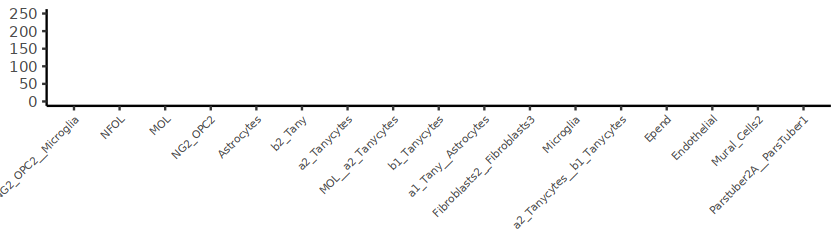

In [19]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_other = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'other')
ggp_d14_other_restored = make_marker_bars(markers_d14_other, cluster_categories, 250)
ggp_d14_other_restored

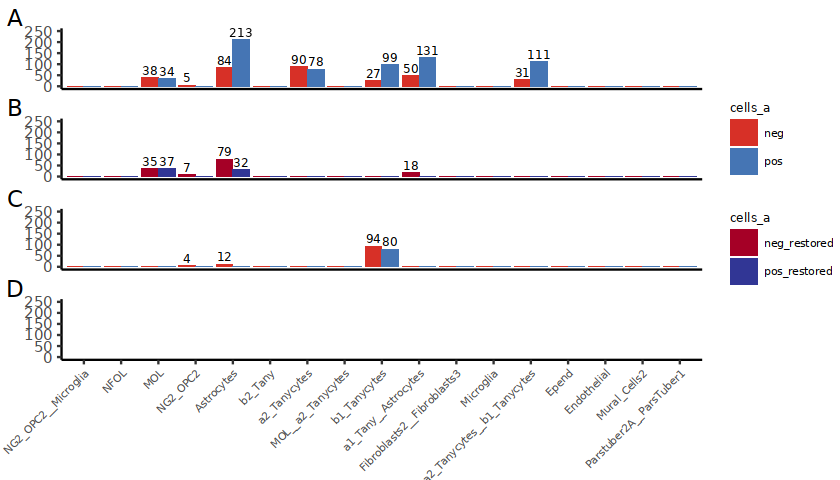

In [20]:
options(repr.plot.width=7, repr.plot.height=4)
layout <- '
A
B
C
D
'
ggp_all_other = wrap_plots(A = ggp_d5_other,
               B = ggp_d5_other_restored,
               C = ggp_d14_other,
               D = ggp_d14_other_restored,
        design = layout) +
    plot_layout(guides = 'collect') & 
      theme(plot.margin = margin(2, 0, 0, 2)) 

ggp_all_other = ggp_all_other + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_other %>% ggsave('deg_count_plot_other.pdf', plot = ., width = 7, height=4)
ggp_all_other

In [21]:
cluster_categories = labels_classes_tib %>% filter(class == 'neuron') %>% pull(cluster)
cluster_categories

[1] "Nr5a1_Bdnf"                "Unassigned1.sc17.sc28"    
 [3] "Sst_Pthlh__Ghrh"           "Gm8773_Tac1__Hdc"         
 [5] "Unassigned1.sc37"          "Tbx19"                    
 [7] "Th_Nfib__Arx_Nr5a2"        "Slc17a6_Fam19a2"          
 [9] "Nr5a1_Bdnf__Unassigned1"   "Tmem215"                  
[11] "Unassigned2"               "Ghrh"                     
[13] "Nr5a1_Bdnf__Nr5a1_Nfib"    "Pomc_Glipr1__Slc17a6_Trhr"
[15] "Unassigned1.sc39"          "Oxt__Unassigned1"         
[17] "Unassigned2__Unassigned1"  "Nr5a1_Nfib"               
[19] "Sst_Pthlh.sc21"            "Kisspeptin"               
[21] "Sst_Pthlh.sc23"            "Gpr50"                    
[23] "Trh_Lef1"                  "Sst_Nts"                  
[25] "Pomc_Lepr"                 "Th_Slc6a3"                
[27] "Agrp"                      "Slc17a6_Trhr"             
[29] "Qrfp"                      "Unassigned2__Rgs16_Vip"   
[31] "Htr3b"                     "Trh_Cxcl12"               
[33] "Nfix_Htr2c"                "Sst_Unc13c__Agrp"         
[35] "Rgs16_Nmu"                 "Rgs16_Dlx1__Unassigned2"  
[37] "Rgs16_Dlx1"

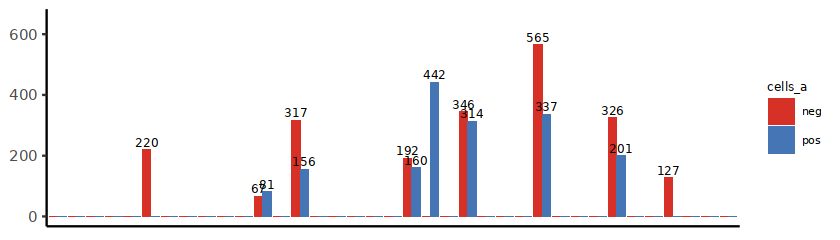

In [22]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'neuron')
ggp_d5_neuron = make_marker_bars(markers_d5_neuron, cluster_categories, 650) +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_neuron

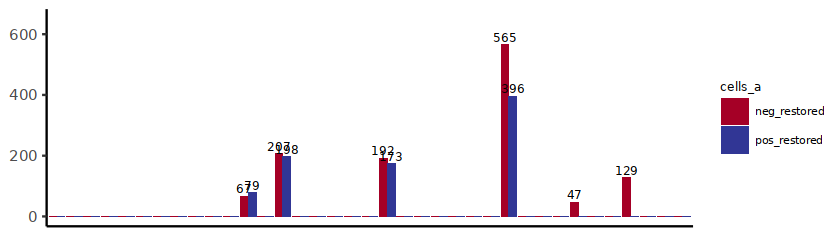

In [23]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d5_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day5'  &
           grouping == 'restored_grouping') %>%
    filter(class == 'neuron')
ggp_d5_neuron_restored = make_marker_bars(markers_d5_neuron, cluster_categories, 650)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d5_neuron_restored

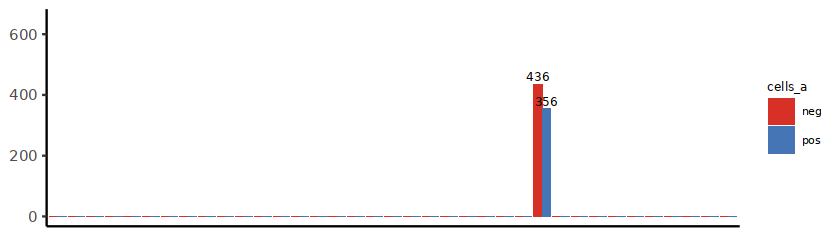

In [24]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'fgf1_grouping') %>%
    filter(class == 'neuron')
ggp_d14_neuron = make_marker_bars(markers_d14_neuron, cluster_categories, 650)  +
                theme(axis.text.x = element_blank(),
                        axis.ticks.x = element_blank())
ggp_d14_neuron

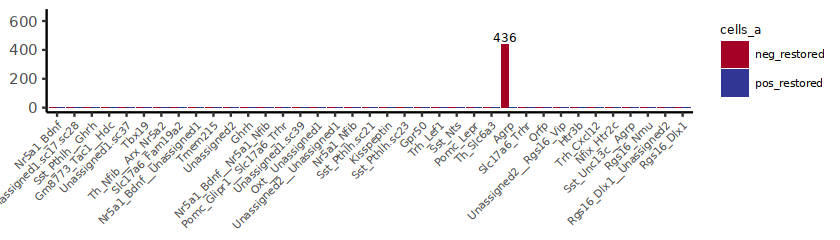

In [25]:
options(repr.plot.width=7, repr.plot.height=2)
markers_d14_neuron = combined_deg_seurat %>%
    filter(fgf1_day == 'Day14'  &
           grouping == 'restored_grouping') %>%
    mutate(cells_a = factor(cells_a, levels=c('neg_restored', 'pos_restored'))) %>%
    filter(class == 'neuron')
ggp_d14_neuron_restored = make_marker_bars(markers_d14_neuron, cluster_categories, 650)
ggp_d14_neuron_restored

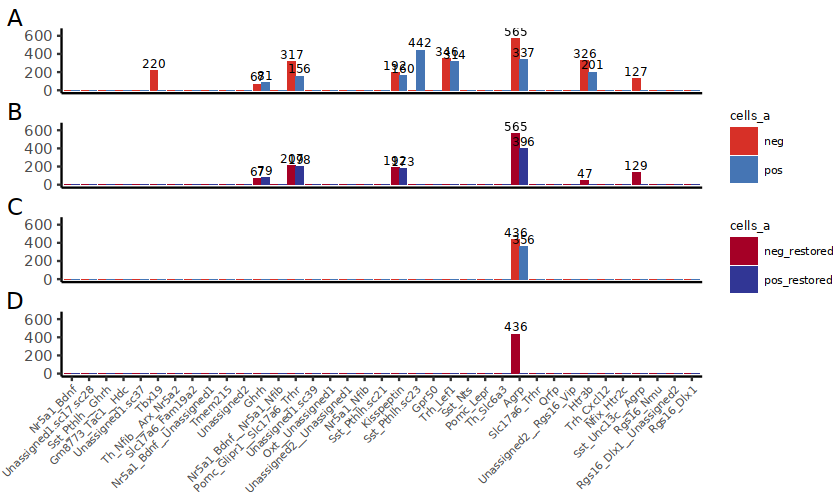

In [26]:
options(repr.plot.width=7, repr.plot.height=4.1)
layout <- '
A
B
C
D
'
ggp_all_neuron = wrap_plots(A = ggp_d5_neuron,
               B = ggp_d5_neuron_restored,
               C = ggp_d14_neuron,
               D = ggp_d14_neuron_restored,
        design = layout) +
    plot_layout(guides = 'collect') & 
      theme(plot.margin = margin(2, 0, 0, 2))  

# + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_neuron = ggp_all_neuron + plot_annotation(tag_levels = c('A', 'B', 'C', 'D'))

ggp_all_neuron %>% ggsave('deg_count_plot_neuron.pdf', plot = ., width = 7, height=4)
ggp_all_neuron

In [27]:
combined_deg_seurat %>% filter(str_detect(GeneID, 'Fgfr'))

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
a2_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,a2_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Fgfr2,4.786760e-08,0.3638201,0.927,0.833,7.982402e-04,ENSMUSG00000030849,1.1270661,NA
a2_Tanycytes___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,a2_Tanycytes,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Fgfr2,1.150471e-06,0.2398674,0.894,0.818,2.027360e-02,ENSMUSG00000030849,0.4061122,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Fgfr1,6.460416e-08,0.2654351,0.577,0.447,1.298156e-03,ENSMUSG00000031565,0.7662243,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Fgfr1,1.001447e-09,0.3678911,0.619,0.447,2.012307e-05,ENSMUSG00000031565,1.7277288,TRUE
b1_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.pos_vs_none,all,b1_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,pos,none,Fgfr2,9.128997e-13,0.5251644,0.986,0.910,1.599583e-08,ENSMUSG00000030849,4.0941785,NA
b1_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.pos_vs_none,all,b1_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,fgf1_grouping,pos,none,Fgfr2,1.484766e-08,0.2634314,0.969,0.906,2.601608e-04,ENSMUSG00000030849,0.9443379,TRUE
b1_Tanycytes___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,b1_Tanycytes,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Fgfr2,5.444683e-08,0.2209981,0.956,0.902,9.713314e-04,ENSMUSG00000030849,0.6657862,TRUE
Sst_Pthlh.sc23___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,Sst_Pthlh.sc23,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Fgfr2,9.637269e-20,0.8212227,0.948,0.856,1.764680e-15,ENSMUSG00000030849,12.1157729,FALSE
Tbx19___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.pos_vs_none,all,Tbx19,neuron,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,pos,none,Fgfr1,3.375623e-07,0.4967520,0.851,0.719,6.044391e-03,ENSMUSG00000031565,1.1021176,NA


In [28]:
combined_deg_seurat %>% filter(str_detect(GeneID, 'Fgfr'))

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
a2_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,a2_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Fgfr2,4.786760e-08,0.3638201,0.927,0.833,7.982402e-04,ENSMUSG00000030849,1.1270661,NA
a2_Tanycytes___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,a2_Tanycytes,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Fgfr2,1.150471e-06,0.2398674,0.894,0.818,2.027360e-02,ENSMUSG00000030849,0.4061122,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Fgfr1,6.460416e-08,0.2654351,0.577,0.447,1.298156e-03,ENSMUSG00000031565,0.7662243,TRUE
Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Fgfr1,1.001447e-09,0.3678911,0.619,0.447,2.012307e-05,ENSMUSG00000031565,1.7277288,TRUE
b1_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.pos_vs_none,all,b1_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,pos,none,Fgfr2,9.128997e-13,0.5251644,0.986,0.910,1.599583e-08,ENSMUSG00000030849,4.0941785,NA
b1_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.pos_vs_none,all,b1_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,fgf1_grouping,pos,none,Fgfr2,1.484766e-08,0.2634314,0.969,0.906,2.601608e-04,ENSMUSG00000030849,0.9443379,TRUE
b1_Tanycytes___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,b1_Tanycytes,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Fgfr2,5.444683e-08,0.2209981,0.956,0.902,9.713314e-04,ENSMUSG00000030849,0.6657862,TRUE
Sst_Pthlh.sc23___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,Sst_Pthlh.sc23,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Fgfr2,9.637269e-20,0.8212227,0.948,0.856,1.764680e-15,ENSMUSG00000030849,12.1157729,FALSE
Tbx19___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.pos_vs_none,all,Tbx19,neuron,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,pos,none,Fgfr1,3.375623e-07,0.4967520,0.851,0.719,6.044391e-03,ENSMUSG00000031565,1.1021176,NA


In [29]:
combined_deg_seurat %>% filter(str_detect(GeneID, 'Tcf7l2'))

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
a2_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_none,all,a2_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,neg,none,Tcf7l2,2.485963e-15,0.4649862,1.000,0.976,4.145592e-11,ENSMUSG00000024985,4.8276794,NA
a2_Tanycytes__b1_Tanycytes___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,a2_Tanycytes__b1_Tanycytes,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Tcf7l2,1.745229e-16,0.6905807,0.887,0.728,2.796729e-12,ENSMUSG00000024985,7.9785198,TRUE
b1_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.pos_vs_none,all,b1_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,fgf1_grouping,pos,none,Tcf7l2,2.158027e-15,0.3970427,0.987,0.891,3.781295e-11,ENSMUSG00000024985,4.1381214,TRUE
b1_Tanycytes___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,b1_Tanycytes,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Tcf7l2,1.038705e-06,0.2683536,0.935,0.888,1.853049e-02,ENSMUSG00000024985,0.4648188,TRUE
b1_Tanycytes___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,b1_Tanycytes,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Tcf7l2,5.195580e-28,0.5305873,0.974,0.888,9.268914e-24,ENSMUSG00000024985,12.2210030,TRUE
Pomc_Glipr1__Slc17a6_Trhr___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.neg_vs_none,all,Pomc_Glipr1__Slc17a6_Trhr,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,neg,none,Tcf7l2,1.520122e-10,0.5908375,0.403,0.244,3.004066e-06,ENSMUSG00000024985,3.2627763,TRUE
Pomc_Glipr1__Slc17a6_Trhr___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,Pomc_Glipr1__Slc17a6_Trhr,neuron,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Tcf7l2,1.653880e-11,0.6586705,0.423,0.244,3.268398e-07,ENSMUSG00000024985,4.2719161,TRUE
Pomc_Glipr1__Slc17a6_Trhr___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Pomc_Glipr1__Slc17a6_Trhr,neuron,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Tcf7l2,1.728971e-06,0.5970121,0.413,0.244,3.416793e-02,ENSMUSG00000024985,0.8754474,TRUE
Sst_Unc13c__Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.pos_restored_vs_none,all,Sst_Unc13c__Agrp,neuron,Day5,obob5v5,Day5,obobBL6d5,restored_grouping,pos_restored,none,Tcf7l2,6.187778e-07,0.2106528,0.188,0.056,1.193127e-02,ENSMUSG00000024985,0.4051513,FALSE


In [30]:
combined_deg_seurat %>% filter(cluster == 'b1_Tanycytes') %>% arrange(p_val_adj)

tag,data_day,cluster,class,fgf1_day,fgf1_comparison,bl6_day,bl6_comparison,grouping,cells_a,cells_b,GeneID,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,ensmusg,gsea_sort_score,n_cells_valid
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
b1_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.neg_vs_none,all,b1_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,fgf1_grouping,neg,none,Ptprd,5.904365e-54,1.1062900,0.968,0.839,1.034563e-49,ENSMUSG00000028399,54.191884,TRUE
b1_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.pos_vs_none,all,b1_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,fgf1_grouping,pos,none,P3h2,2.251598e-48,1.4177137,0.871,0.556,3.945250e-44,ENSMUSG00000038168,61.534339,TRUE
b1_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.neg_vs_none,all,b1_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,fgf1_grouping,neg,none,Prr16,1.637143e-41,0.8843999,0.960,0.756,2.868602e-37,ENSMUSG00000073565,32.318032,TRUE
b1_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___fgf1_grouping.pos_vs_none,all,b1_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,fgf1_grouping,pos,none,Inpp4b,3.027187e-39,0.9462260,0.972,0.760,5.304237e-35,ENSMUSG00000037940,32.432251,TRUE
b1_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.pos_vs_none,all,b1_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,pos,none,Il1rapl2,1.320385e-38,1.6317157,0.928,0.547,2.313579e-34,ENSMUSG00000059203,54.883925,NA
b1_Tanycytes___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,b1_Tanycytes,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Adam23,6.388223e-36,0.6727164,0.920,0.736,1.139659e-31,ENSMUSG00000025964,20.816016,TRUE
b1_Tanycytes___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,b1_Tanycytes,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,P3h2,5.605069e-35,1.1345764,0.794,0.540,9.999443e-31,ENSMUSG00000038168,34.037319,TRUE
b1_Tanycytes___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none,all,b1_Tanycytes,other,Day5,obob5v5,Day5,obobBL6d5,fgf1_grouping,pos,none,Inpp4b,5.456185e-34,0.7117841,0.940,0.721,9.733834e-30,ENSMUSG00000037940,20.650079,TRUE
b1_Tanycytes___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.pos_vs_none,all,b1_Tanycytes,other,Day14,obob14v14,Day14,obobBL6d14,bl6_grouping,pos,none,Meg3,1.877822e-33,0.9091977,1.000,0.973,3.290320e-29,ENSMUSG00000021268,25.896461,NA


In [31]:
combined_deg_seurat %>% write_xlsx('combined_deg_seurat_d5_d14.xlsx')